In [15]:
from sklearn.feature_selection import mutual_info_regression
from SALib.sample import saltelli
from tqdm.auto import tqdm
import numpy as np
import pickle
import time
import lzma
import sys
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})

plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [2]:
os.chdir("../")
import cpt_optimisation

In [3]:
result = {i:[] for i in range(3)}

start_t = time.time()
num_agents = 1225

for seed_folder in os.listdir("DATA/nodebt/"):
    print(f"{time.time()-start_t:.2f} | {seed_folder}")
    if "DS_" in seed_folder:
        continue

    seed = int(seed_folder.split("_")[-1])
    files = os.listdir(f"DATA/nodebt/{seed_folder}")
    
    for f in tqdm(files):
        param_idx = int(f.split("_")[1]) - 1
        data = pickle.load(lzma.open(f"DATA/nodebt/{seed_folder}/{f}"))
        data_W = data["W"]
        
        # determine regime
        prop_richer = sum(data_W[-1] > data_W[0]) / num_agents
        if prop_richer == 0:
            regime = 0
        elif prop_richer < 1:
            regime = 1
        else:
            regime = 2
            
        MI = mutual_info_regression(data["A"].reshape(-1,1), data["W"][-1].astype(np.float32))[0]
        result[regime].append((MI, seed, param_idx))

0.00 | new_model_runs_paper_14


  0%|          | 0/7168 [00:00<?, ?it/s]

864.87 | new_model_runs_paper_13


  0%|          | 0/7168 [00:00<?, ?it/s]

1741.68 | new_model_runs_paper_12


  0%|          | 0/7168 [00:00<?, ?it/s]

2619.55 | new_model_runs_paper_15


  0%|          | 0/7168 [00:00<?, ?it/s]

3489.13 | .DS_Store
3489.13 | new_model_runs_paper_0


  0%|          | 0/7168 [00:00<?, ?it/s]

4363.57 | new_model_runs_paper_7


  0%|          | 0/7168 [00:00<?, ?it/s]

5239.88 | new_model_runs_paper_9


  0%|          | 0/7168 [00:00<?, ?it/s]

6099.92 | new_model_runs_paper_8


  0%|          | 0/7168 [00:00<?, ?it/s]

6974.77 | new_model_runs_paper_6


  0%|          | 0/7168 [00:00<?, ?it/s]

7849.43 | new_model_runs_paper_1


  0%|          | 0/7168 [00:00<?, ?it/s]

8745.53 | new_model_runs_paper_19


  0%|          | 0/7168 [00:00<?, ?it/s]

9619.10 | new_model_runs_paper_10


  0%|          | 0/7168 [00:00<?, ?it/s]

10505.91 | new_model_runs_paper_17


  0%|          | 0/7168 [00:00<?, ?it/s]

11392.32 | new_model_runs_paper_16


  0%|          | 0/7168 [00:00<?, ?it/s]

12285.64 | new_model_runs_paper_11


  0%|          | 0/7168 [00:00<?, ?it/s]

13160.68 | new_model_runs_paper_18


  0%|          | 0/7168 [00:00<?, ?it/s]

14052.51 | new_model_runs_paper_4


  0%|          | 0/7168 [00:00<?, ?it/s]

14943.18 | new_model_runs_paper_3


  0%|          | 0/7168 [00:00<?, ?it/s]

15826.51 | new_model_runs_paper_2


  0%|          | 0/7168 [00:00<?, ?it/s]

16703.87 | new_model_runs_paper_5


  0%|          | 0/7168 [00:00<?, ?it/s]

In [4]:
with open("attention_results.pickle", "wb") as f:
    pickle.dump(result, f)

In [4]:
with open("attention_results.pickle", "rb") as f:
    result = pickle.load(f)

In [183]:
regime = 1
sorted_mi_items = sorted(result[regime], key=lambda x: x[0])
item = sorted_mi_items[-1]
s, p = item[1], item[2] + 1

In [184]:
data = pickle.load(lzma.open(f"DATA/nodebt/new_model_runs_paper_{s}/{s}_{p}_paper.pkl.lzma"))
data_W = data["W"]

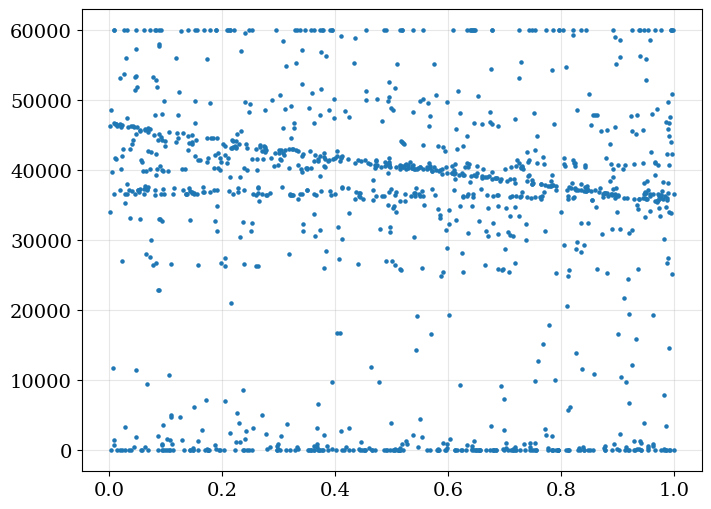

0.28197983794212433

In [185]:
plt.scatter(data["A"], data_W[-1,:], s=5)
plt.show()
MI = mutual_info_regression(data["A"].reshape(-1,1), data["W"][-1].astype(np.float32))[0]
MI

In [176]:
alpha_val = data["params"][4]
with open(f"sda_graphs/{s}_{alpha_val}.pickle", "rb") as f:
    communities, community_membership, _, _ = pickle.load(f)

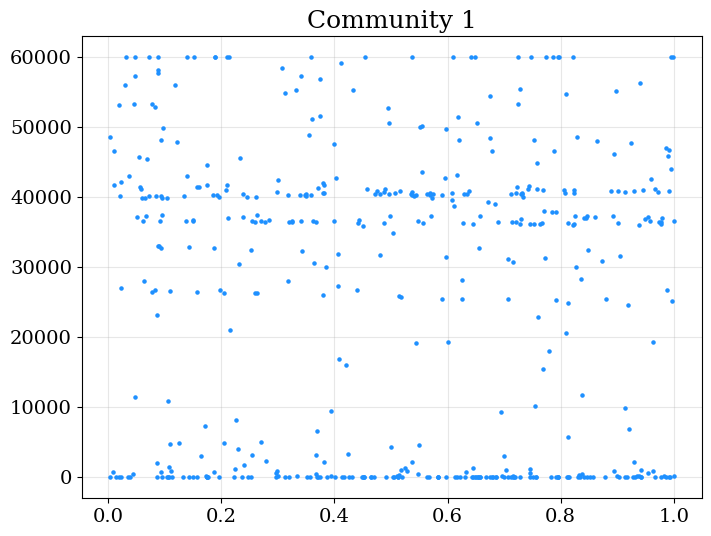

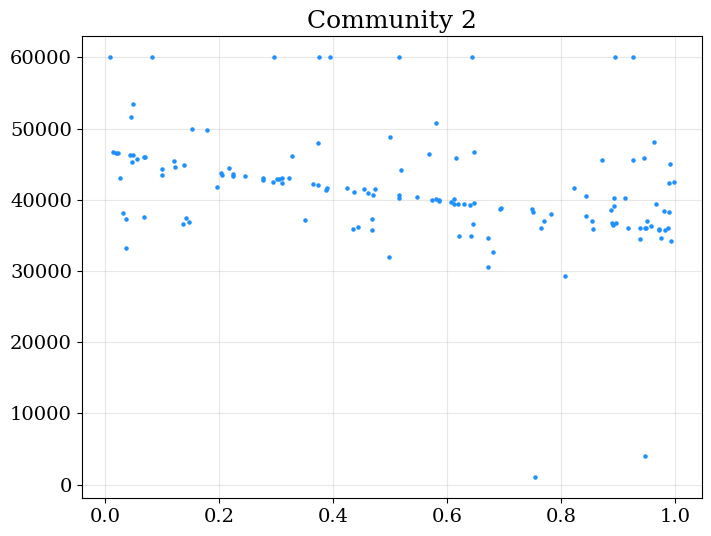

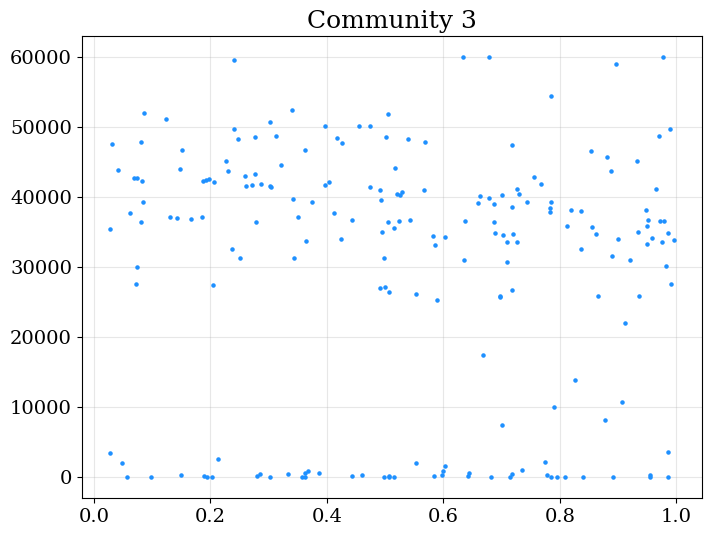

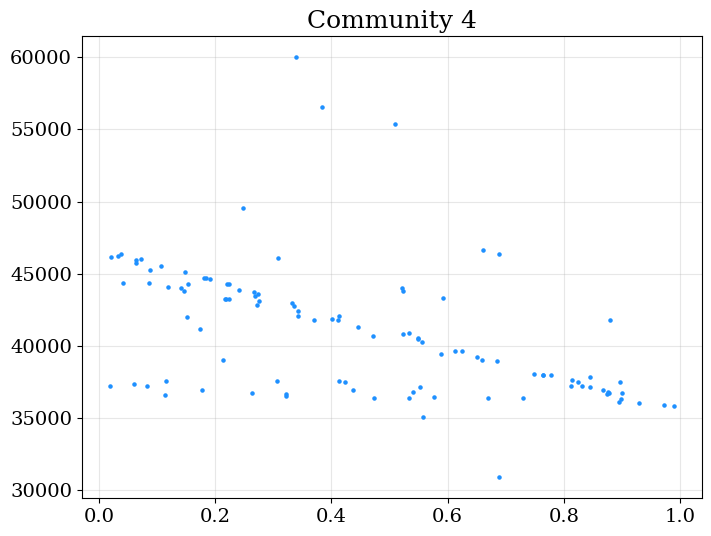

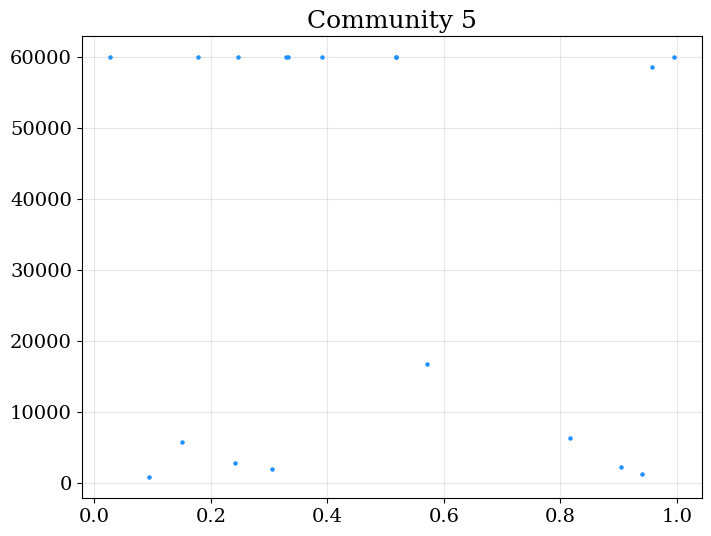

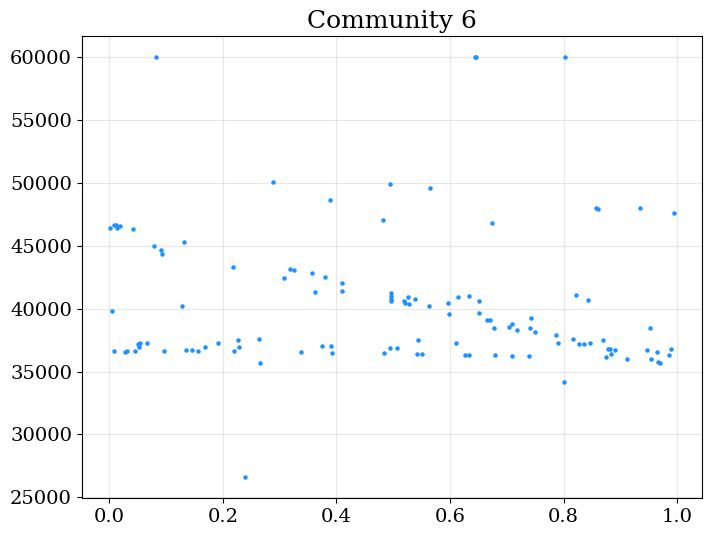

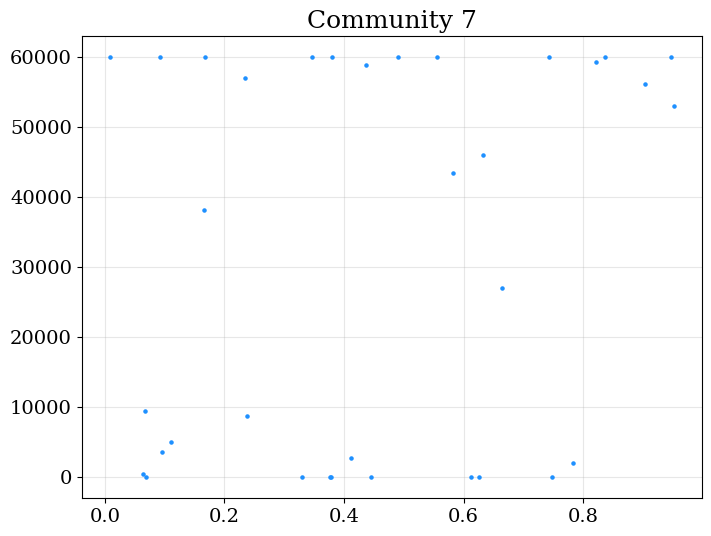

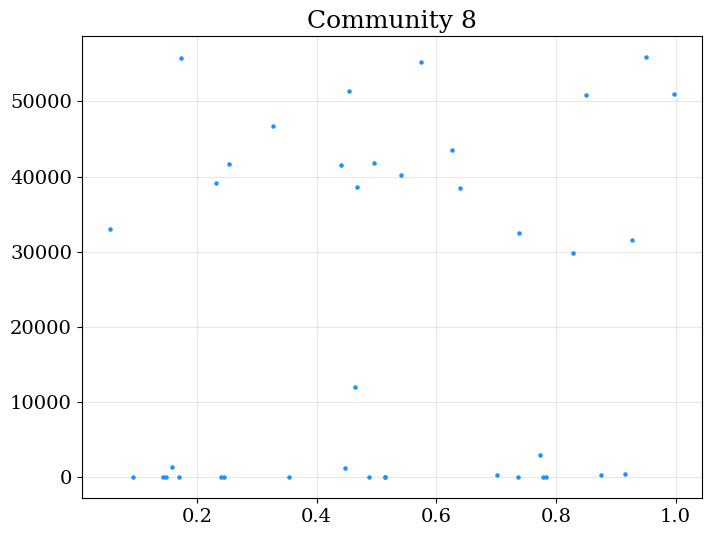

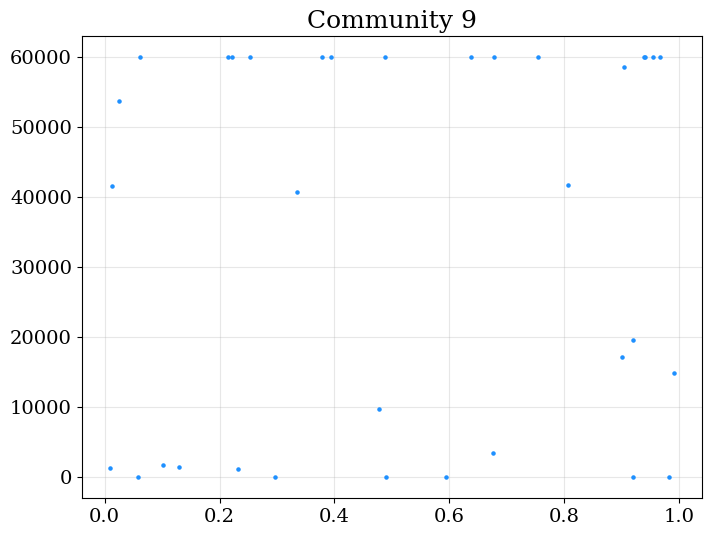

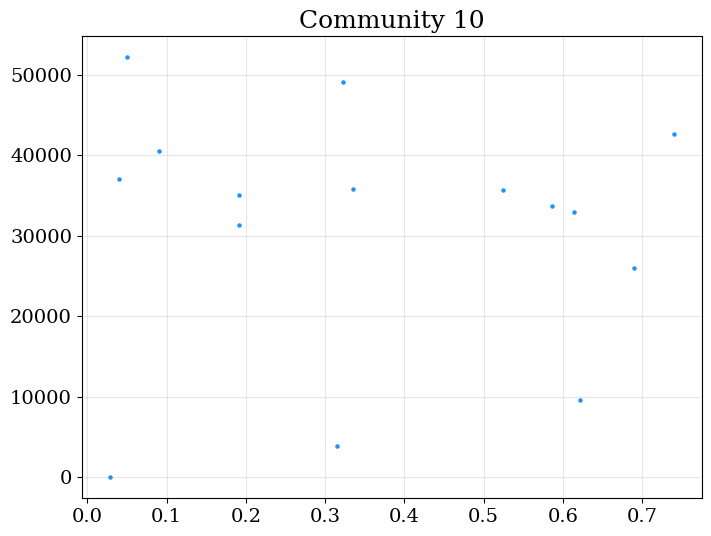

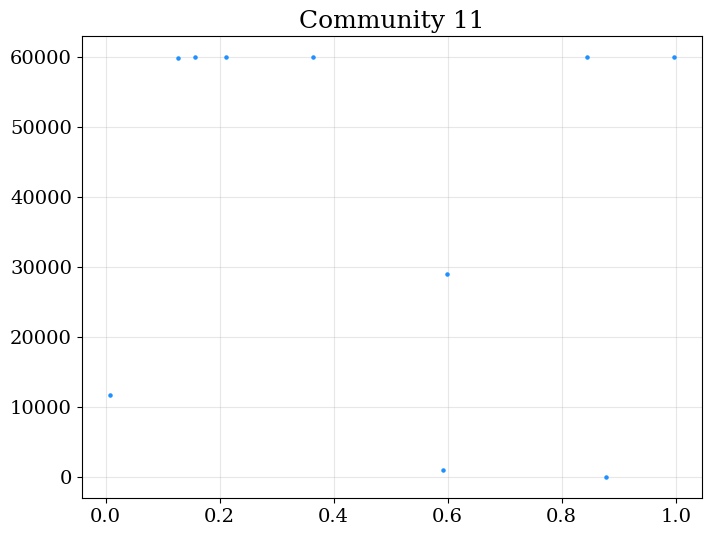

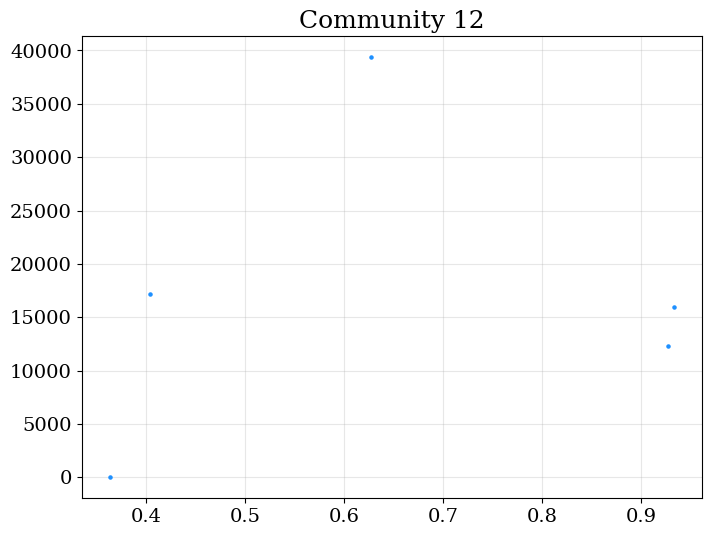

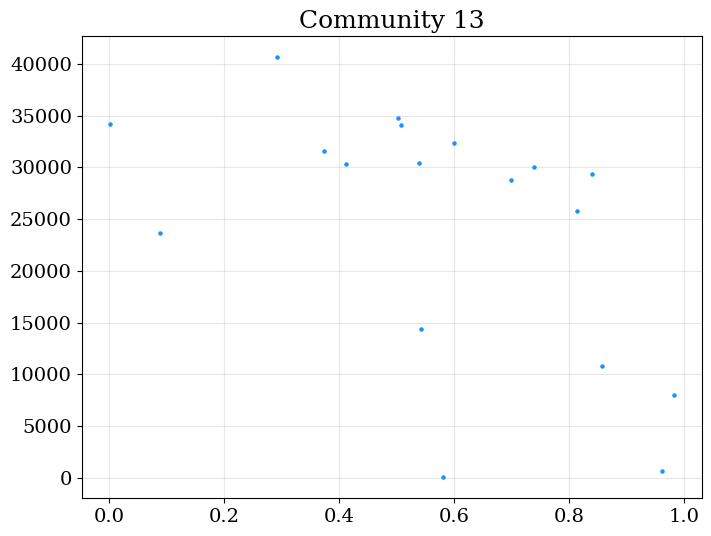

In [177]:
for i,c in enumerate(communities):
    idx = np.array(list(c))
    plt.scatter(data["A"][idx], data["W"][-1,idx], s=5, color="dodgerblue")
    plt.title(f"Community {i+1}")
    plt.show()

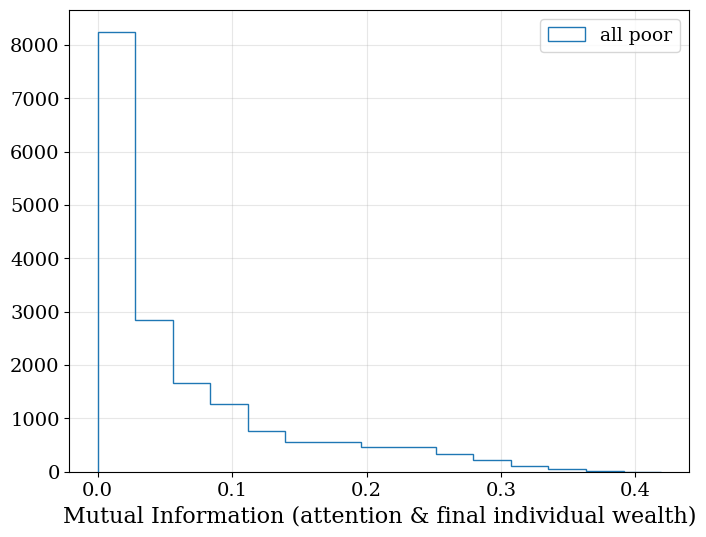

In [33]:
plt.hist(data[0], histtype="step", bins=15, label="all poor")
# plt.hist(data[1], histtype="step", bins=15, label="some rich", density=True)
# plt.hist(data[2], histtype="step", bins=15, label="all rich", density=True)


# plt.yscale("log")
plt.legend()
plt.xlabel("Mutual Information (attention & final individual wealth)")

plt.show()

In [32]:
len(data[0])

17537